<a href="https://colab.research.google.com/github/Purohit1999/Data_Science/blob/main/Regression_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null  

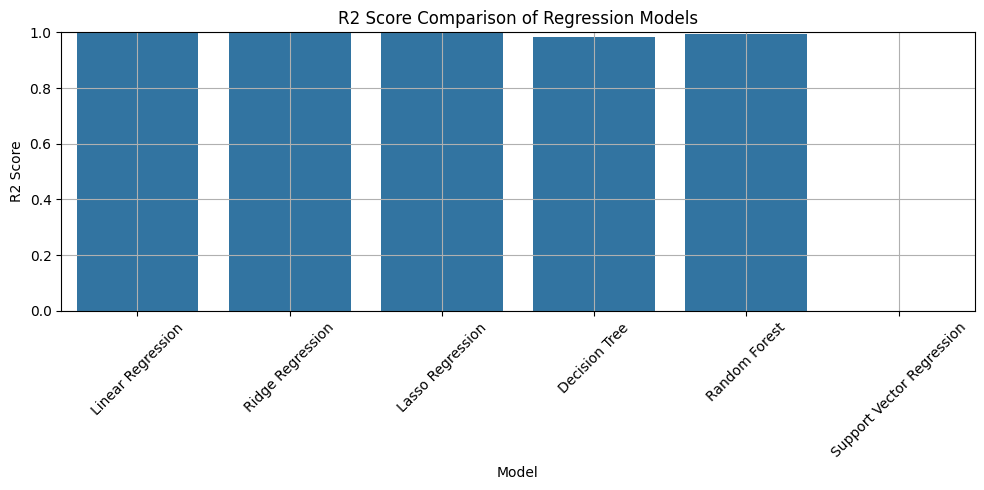

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv("house_price_regression_dataset.csv")  # Adjust path if needed

# Step 3: Explore Dataset (optional)
print(df.head())
print(df.info())
print(df.describe())

# Step 4: Preprocess Data
df.dropna(inplace=True)  # Drop missing values
X = df.drop('House_Price', axis=1)  # Features
y = df['House_Price']              # Target

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Define Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf')
}

# Step 7: Train and Evaluate Models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "R2 Score": r2})

# Step 8: Convert Results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Step 9:  Plot Model Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R2 Score', data=results_df)
plt.title("R2 Score Comparison of Regression Models")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 10: Save Results (Optional)
results_df.to_csv("regression_model_results.csv", index=False)


                       Model           MSE  R2 Score  Time (s)
0          Linear Regression  1.014348e+08    0.9984    0.0029
1           Ridge Regression  1.014381e+08    0.9984    0.0027
2           Lasso Regression  1.014348e+08    0.9984    0.0028
3              Decision Tree  9.696001e+08    0.9850    0.0075
4              Random Forest  3.941317e+08    0.9939    0.7069
5  Support Vector Regression  6.448085e+10   -0.0003    0.1249


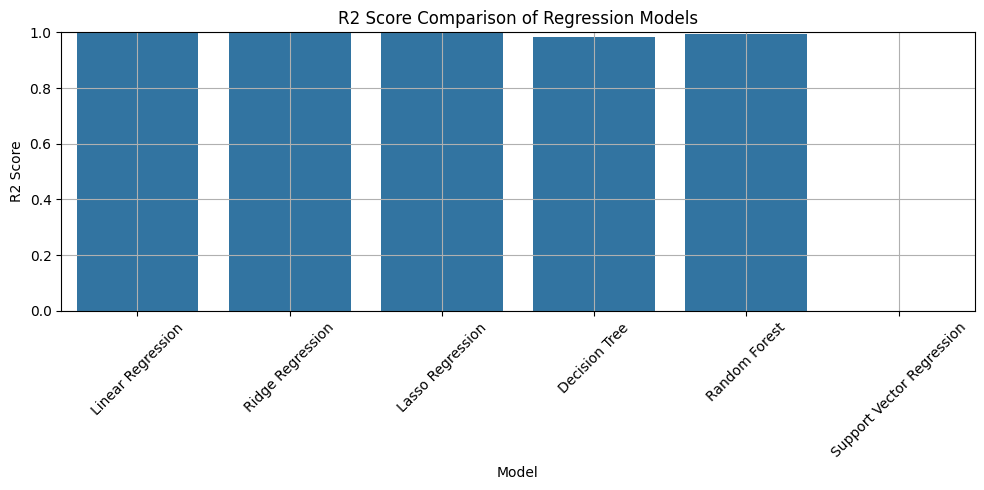

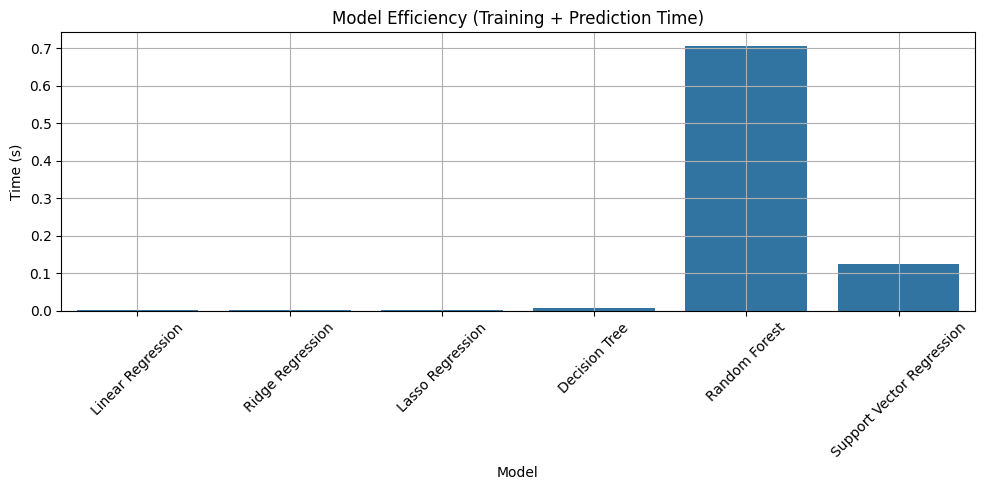

In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv("house_price_regression_dataset.csv")  # Update path if needed

# Step 3: Preprocessing
df.dropna(inplace=True)
X = df.drop('House_Price', axis=1)
y = df['House_Price']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf')
}

# Step 6: Train, Predict, and Evaluate with Time Tracking
results = []

for name, model in models.items():
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    end_time = time.time()
    elapsed_time = end_time - start_time

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MSE": round(mse, 2),
        "R2 Score": round(r2, 4),
        "Time (s)": round(elapsed_time, 4)
    })

# Step 7: Results DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Step 8:  Visualize R2 Scores
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R2 Score', data=results_df)
plt.title("R2 Score Comparison of Regression Models")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Visualize Time Efficiency
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Time (s)', data=results_df)
plt.title("Model Efficiency (Training + Prediction Time)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 10: Save Results
results_df.to_csv("regression_model_results_with_efficiency.csv", index=False)


                       Model           MSE  R2 Score  Time (s)
0          Linear Regression  1.014348e+08    0.9984    0.0032
1           Ridge Regression  1.014381e+08    0.9984    0.0028
2           Lasso Regression  1.014348e+08    0.9984    0.0030
3              Decision Tree  9.696001e+08    0.9850    0.0071
4              Random Forest  3.941317e+08    0.9939    0.9427
5  Support Vector Regression  6.448085e+10   -0.0003    0.1727
6              KNN Regressor  1.047852e+09    0.9837    0.0073
7         AdaBoost Regressor  8.679550e+08    0.9865    0.3181


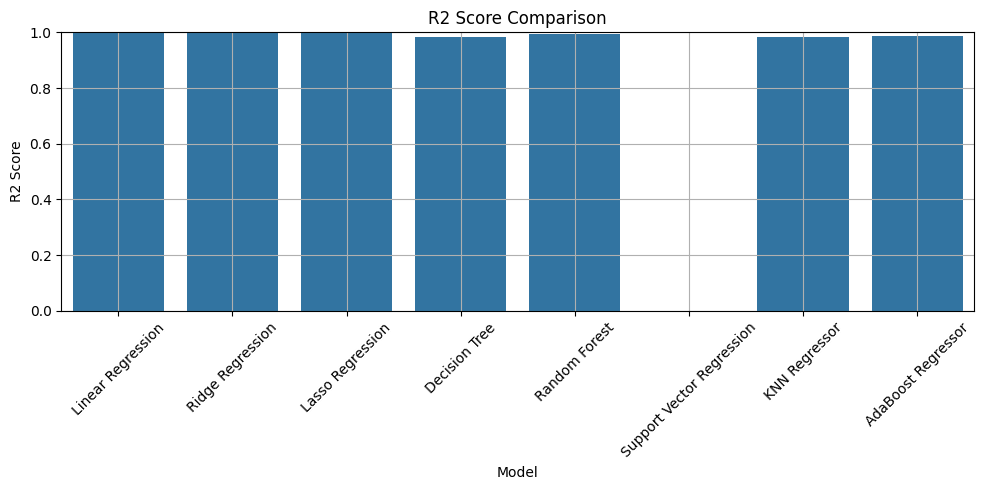

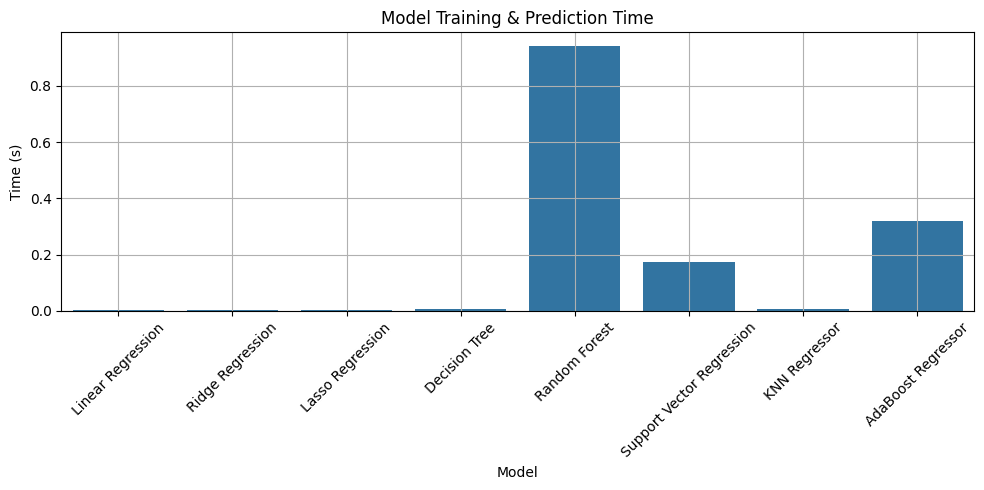

In [3]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv("house_price_regression_dataset.csv")  # Ensure path is correct

# Step 3: Preprocessing
df.dropna(inplace=True)
X = df.drop('House_Price', axis=1)
y = df['House_Price']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define Regression Models (including KNN & AdaBoost)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf'),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Step 6: Train, Predict, Evaluate & Track Time
results = []

for name, model in models.items():
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    end_time = time.time()
    elapsed_time = end_time - start_time

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MSE": round(mse, 2),
        "R2 Score": round(r2, 4),
        "Time (s)": round(elapsed_time, 4)
    })

# Step 7: View Results
results_df = pd.DataFrame(results)
print(results_df)

# Step 8: R2 Score Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R2 Score', data=results_df)
plt.title("R2 Score Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Execution Time Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Time (s)', data=results_df)
plt.title("Model Training & Prediction Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 10: Export Results
results_df.to_csv("regression_model_results_with_efficiency.csv", index=False)


                                Model           MSE  R2 Score  Time (s)
0                   Linear Regression  1.014348e+08    0.9984    0.0030
1                    Ridge Regression  1.014381e+08    0.9984    0.0027
2                    Lasso Regression  1.014348e+08    0.9984    0.0028
3                       Decision Tree  9.696001e+08    0.9850    0.0072
4                       Random Forest  3.941317e+08    0.9939    0.5980
5  Support Vector Regression (Linear)  7.539197e+08    0.9883    0.2996
6                       KNN Regressor  1.047852e+09    0.9837    0.0061
7                  AdaBoost Regressor  8.679550e+08    0.9865    0.5788


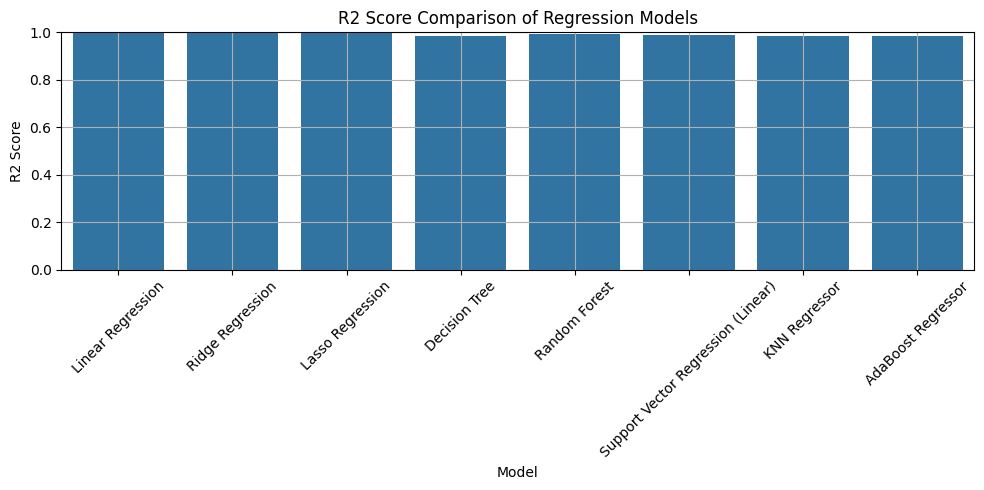

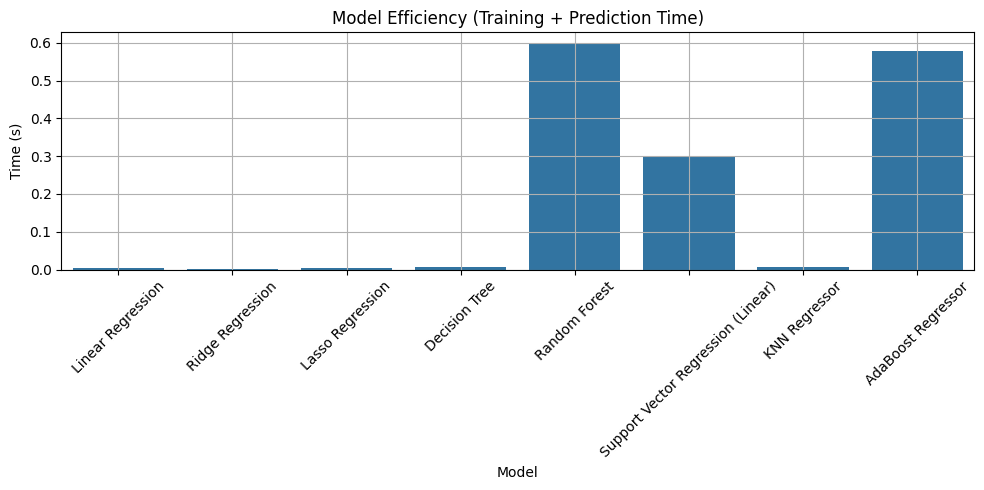

In [4]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv("house_price_regression_dataset.csv")  # Make sure file is in correct location

# Step 3: Preprocess Data
df.dropna(inplace=True)
X = df.drop('House_Price', axis=1)
y = df['House_Price']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define Models (Include only the best SVR: linear)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression (Linear)": SVR(kernel='linear'),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Step 6: Train, Predict, Evaluate and Measure Time
results = []

for name, model in models.items():
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    end_time = time.time()
    elapsed_time = end_time - start_time

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MSE": round(mse, 2),
        "R2 Score": round(r2, 4),
        "Time (s)": round(elapsed_time, 4)
    })

# Step 7: Create and View Results DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Step 8: Plot R2 Score Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R2 Score', data=results_df)
plt.title("R2 Score Comparison of Regression Models")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Plot Efficiency (Time) Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Time (s)', data=results_df)
plt.title("Model Efficiency (Training + Prediction Time)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 10: Export Results
results_df.to_csv("regression_model_results_with_efficiency.csv", index=False)


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)
df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 21)])
df["Heart Disease Status"] = y

# Split features and target
X = df.drop("Heart Disease Status", axis=1)
y = df["Heart Disease Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Ridge Classifier": RidgeClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=5),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "SVM (RBF Kernel)": SVC(kernel='rbf')
}

# Train, predict, and evaluate
results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Time (s)": round(end_time - start_time, 4)
    })

# Show results
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Time (s)
0  Logistic Regression     0.825    0.0793
1     Ridge Classifier     0.825    0.0090
2        Decision Tree     0.835    0.0752
3        Random Forest     0.920    0.8286
4             AdaBoost     0.860    1.2167
5       KNN Classifier     0.935    0.1188
6  SVM (Linear Kernel)     0.825    0.0823
7     SVM (RBF Kernel)     0.940    0.1080



=== Model Comparison ===
                 Model  Accuracy  Time (s)
0  Logistic Regression     0.825    0.0037
1     Ridge Classifier     0.825    0.0034
2        Decision Tree     0.835    0.0242
3        Random Forest     0.920    0.6102
4             AdaBoost     0.860    0.9112
5       KNN Classifier     0.935    0.0139
6  SVM (Linear Kernel)     0.825    0.0533
7     SVM (RBF Kernel)     0.940    0.0862


/tmp/ipython-input-7-2947888056.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


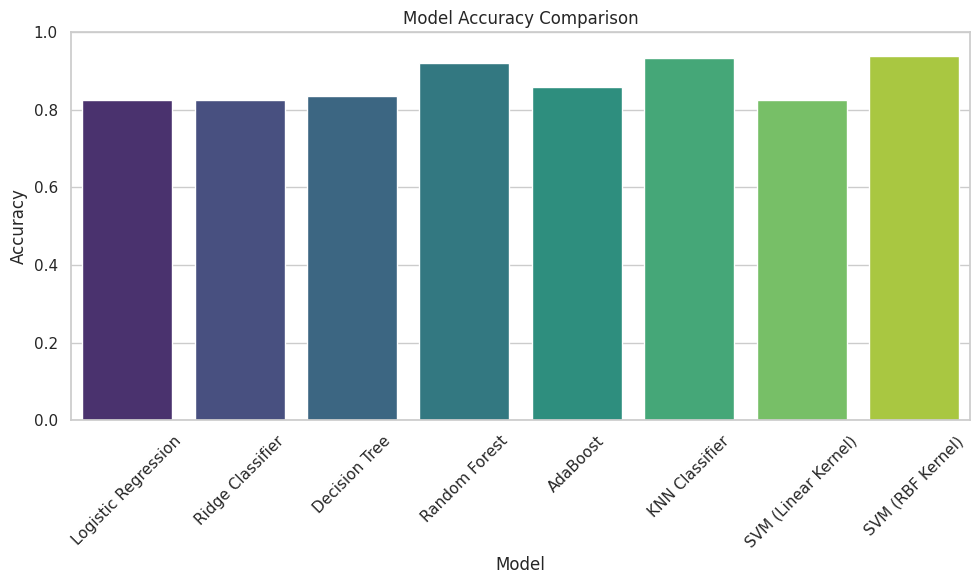

/tmp/ipython-input-7-2947888056.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Time (s)', data=results_df, palette='coolwarm')


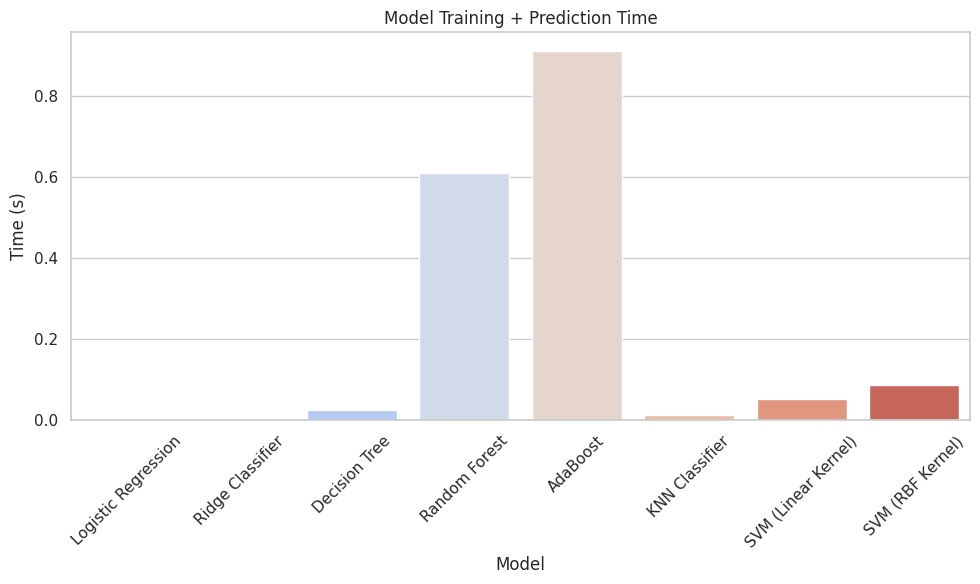

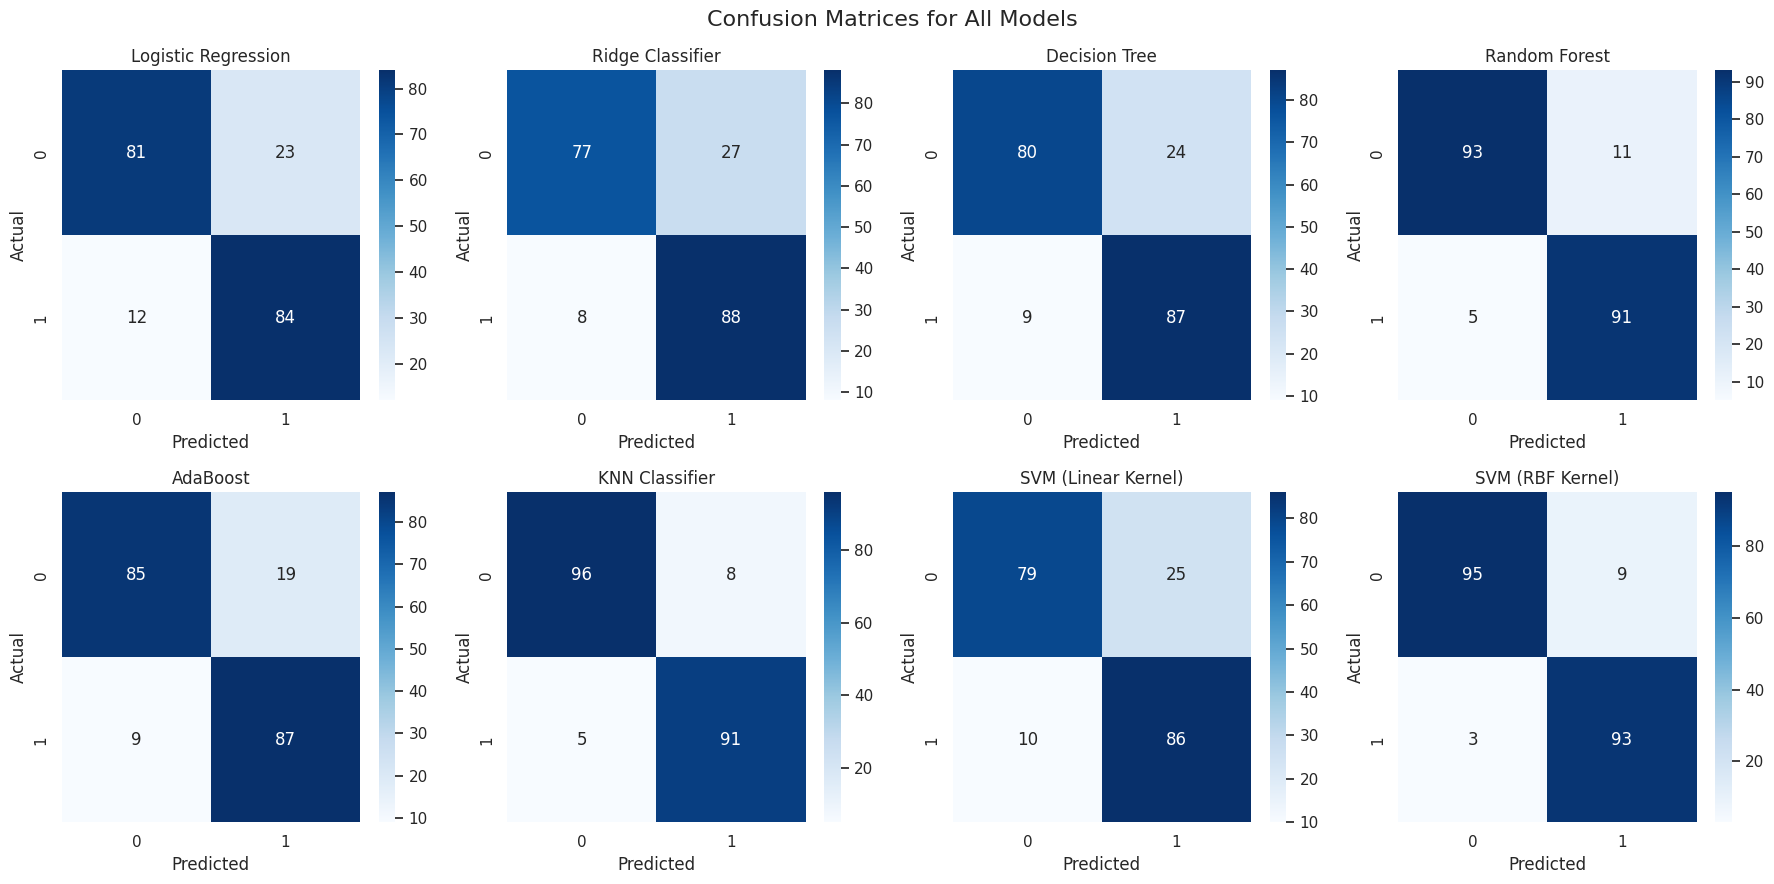


=== Classification Report: Logistic Regression ===
              precision    recall  f1-score  support
0              0.870968  0.778846  0.822335  104.000
1              0.785047  0.875000  0.827586   96.000
accuracy       0.825000  0.825000  0.825000    0.825
macro avg      0.828007  0.826923  0.824961  200.000
weighted avg   0.829726  0.825000  0.824856  200.000

=== Classification Report: Ridge Classifier ===
              precision    recall  f1-score  support
0              0.905882  0.740385  0.814815  104.000
1              0.765217  0.916667  0.834123   96.000
accuracy       0.825000  0.825000  0.825000    0.825
macro avg      0.835550  0.828526  0.824469  200.000
weighted avg   0.838363  0.825000  0.824083  200.000

=== Classification Report: Decision Tree ===
              precision    recall  f1-score  support
0              0.898876  0.769231  0.829016  104.000
1              0.783784  0.906250  0.840580   96.000
accuracy       0.835000  0.835000  0.835000    0.835
macro

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set visual style
sns.set(style="whitegrid")

# Step 1: Create synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           n_informative=10, random_state=42)

# Step 2: Build DataFrame
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 21)])
df['Heart Disease Status'] = y

# Step 3: Train-test split
X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Ridge Classifier": RidgeClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=5),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "SVM (RBF Kernel)": SVC(kernel='rbf')
}

# Step 6: Train models and evaluate
results = []
conf_matrices = {}
classification_reports = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()

    acc = accuracy_score(y_test, y_pred)
    duration = end_time - start_time

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Time (s)": round(duration, 4)
    })

    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    classification_reports[name] = classification_report(y_test, y_pred, output_dict=True)

# Step 7: Show result summary
results_df = pd.DataFrame(results)
print("\n=== Model Comparison ===")
print(results_df)

# Step 8: Accuracy Comparison Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Step 9: Time Efficiency Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Time (s)', data=results_df, palette='coolwarm')
plt.title('Model Training + Prediction Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 10: Confusion Matrix Grid Plot
fig, axes = plt.subplots(2, 4, figsize=(18, 9))
axes = axes.flatten()

for idx, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=axes[idx])
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.suptitle("Confusion Matrices for All Models", fontsize=16)
plt.tight_layout()
plt.show()

# Step 11: Display Classification Reports
for name, report in classification_reports.items():
    print(f"\n=== Classification Report: {name} ===")
    print(pd.DataFrame(report).T)
